In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up professional visualization style
sns.set_style("darkgrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['lines.linewidth'] = 2

In [3]:
# Load the three datasets
df_pressure = pd.read_csv('data/Sea-Water-Pressure-Binned-days.csv')
df_chlorophyll = pd.read_csv('data/Chlorophyll-Binned-days-CTD.csv')
df_oxygen_sat = pd.read_csv('data/Oxygen-Saturation_-Binned-days.csv')
df_fluroescent = pd.read_csv('data/Fluorescent-Dissolved-Organic-Matter-Binned-days.csv')

# Convert time columns to datetime if they exist
for df in [df_pressure, df_chlorophyll, df_oxygen_sat, df_fluroescent]:
    for col in df.columns:
        if 'time' in col.lower() or 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')

print("✓ Sea-Water-Pressure shape:", df_pressure.shape)
print("✓ Chlorophyll shape:", df_chlorophyll.shape)
print("✓ Oxygen-Saturation shape:", df_oxygen_sat.shape)
print("✓ Fluroscent shape:", df_fluroescent.shape)
print("\nDataframes loaded successfully!")

✓ Sea-Water-Pressure shape: (737, 5)
✓ Chlorophyll shape: (737, 5)
✓ Oxygen-Saturation shape: (737, 5)
✓ fluroscent shape: (395, 5)
Index(['Start date', 'End date', 'Mean', 'Min', 'Max'], dtype='object')

Dataframes loaded successfully!


# Exploratory Data Analysis - Ocean Data

## Dataset 1: Sea-Water-Pressure 

In [59]:
# Overview of Sea-Water-Pressure Dataset
print("=" * 60)
print("SEA-WATER-PRESSURE DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {df_pressure.shape}")
print(f"Columns: {list(df_pressure.columns)}\n")
print(df_pressure.head(10))
print("\n" + "=" * 60)

SEA-WATER-PRESSURE DATASET OVERVIEW

Shape: (737, 5)
Columns: ['Start date', 'End date', 'Mean', 'Min', 'Max']

                 Start date                  End date      Mean    Min    Max
0 2023-12-30 00:00:00+00:00 2023-12-31 00:00:00+00:00  3.462311  2.043  4.796
1 2023-12-31 00:00:00+00:00 2024-01-01 00:00:00+00:00  3.504747  2.228  4.620
2 2024-01-01 00:00:00+00:00 2024-01-02 00:00:00+00:00  3.485392  2.422  4.207
3 2024-01-02 00:00:00+00:00 2024-01-03 00:00:00+00:00  3.487472  2.656  4.204
4 2024-01-03 00:00:00+00:00 2024-01-04 00:00:00+00:00  3.489997  2.663  4.164
5 2024-01-04 00:00:00+00:00 2024-01-05 00:00:00+00:00  3.437686  2.289  4.450
6 2024-01-05 00:00:00+00:00 2024-01-06 00:00:00+00:00  3.441928  2.601  4.338
7 2024-01-06 00:00:00+00:00 2024-01-07 00:00:00+00:00  3.462153  2.388  4.562
8 2024-01-07 00:00:00+00:00 2024-01-08 00:00:00+00:00  3.438267  1.884  4.604
9 2024-01-08 00:00:00+00:00 2024-01-09 00:00:00+00:00  3.394686  2.137  4.624



In [60]:
# Statistical Summary for Sea-Water-Pressure
print("\nSTATISTICAL SUMMARY:")
print(df_pressure.describe().round(3))
print("\nMISSING VALUES:")
print(df_pressure.isnull().sum())
print("\nDATA TYPES:")
print(df_pressure.dtypes)


STATISTICAL SUMMARY:
          Mean      Min      Max
count  735.000  735.000  735.000
mean     3.385    2.373    4.332
std      0.066    0.273    0.243
min      3.150    1.630    3.581
25%      3.333    2.194    4.162
50%      3.388    2.363    4.308
75%      3.433    2.553    4.494
max      4.029    3.725    5.210

MISSING VALUES:
Start date    0
End date      0
Mean          2
Min           2
Max           2
dtype: int64

DATA TYPES:
Start date    datetime64[ns, UTC]
End date      datetime64[ns, UTC]
Mean                      float64
Min                       float64
Max                       float64
dtype: object


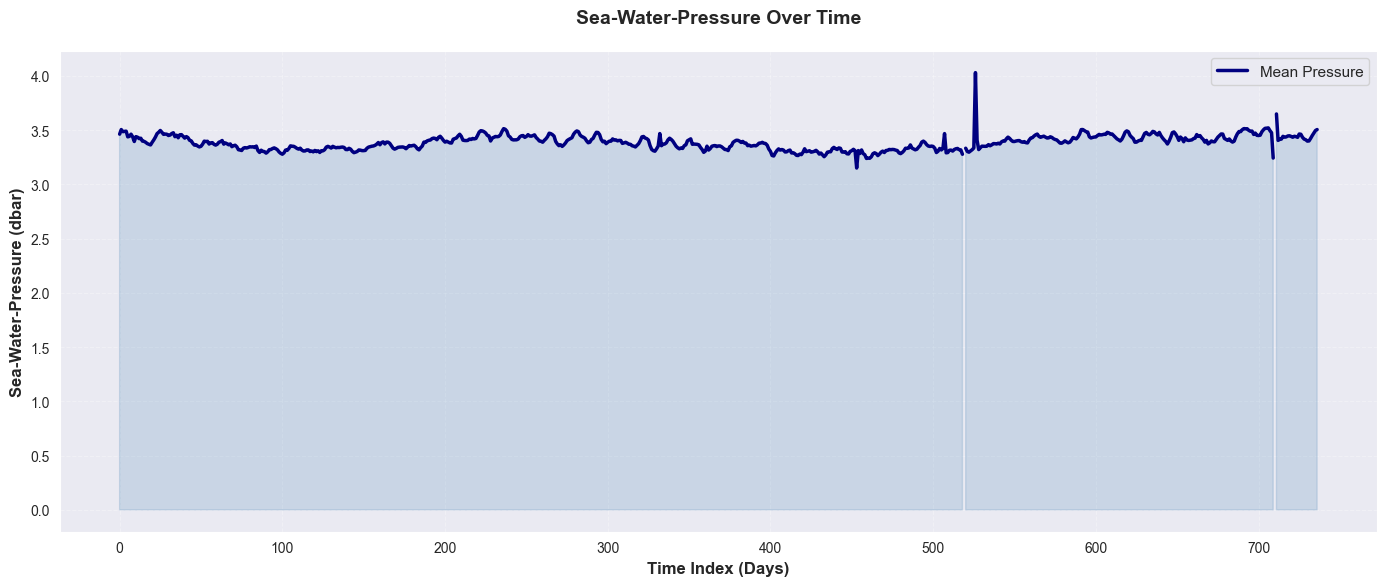

In [61]:
# Sea-Water-Pressure: Time Series Line Graph
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_pressure)), df_pressure['Mean'], linewidth=2.5, color='navy', label='Mean Pressure')
ax.fill_between(range(len(df_pressure)), df_pressure['Mean'], alpha=0.2, color='steelblue')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Sea-Water-Pressure (dbar)', fontsize=12, fontweight='bold')
ax.set_title('Sea-Water-Pressure Over Time', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

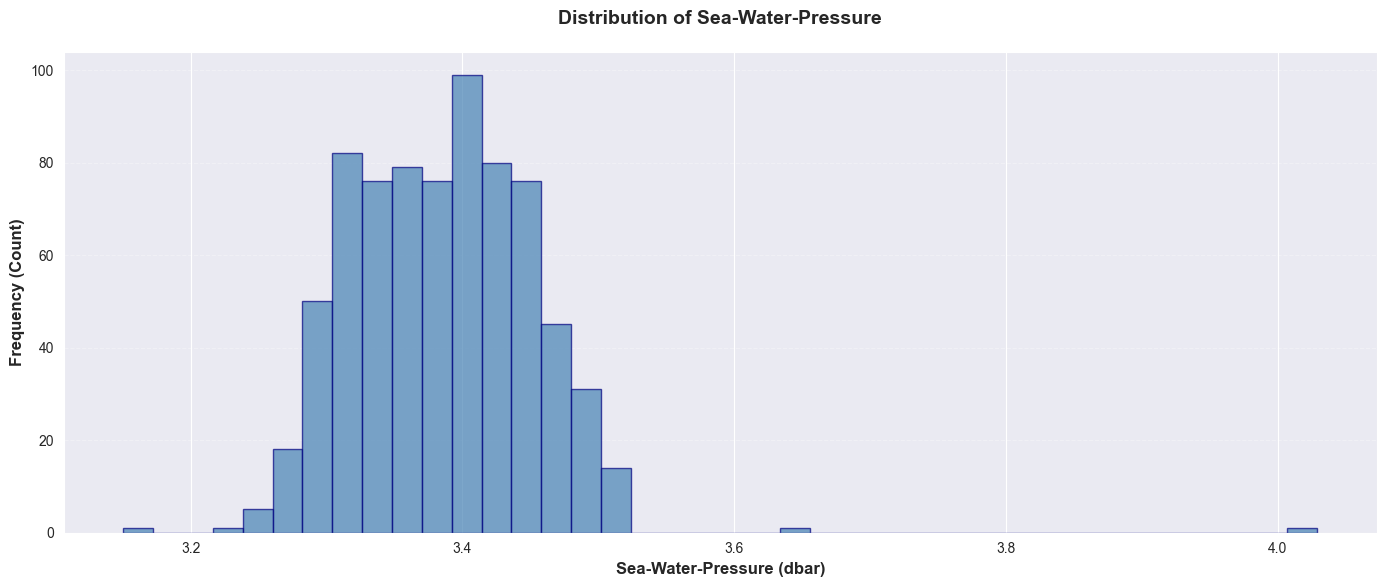

In [62]:
# Sea-Water-Pressure: Histogram Distribution
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(df_pressure['Mean'].dropna(), bins=40, color='steelblue', edgecolor='navy', alpha=0.7)
ax.set_xlabel('Sea-Water-Pressure (dbar)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency (Count)', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Sea-Water-Pressure', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Dataset 2: Chlorophyll (Binned Days)

In [63]:
# Overview of Chlorophyll Dataset
print("=" * 60)
print("CHLOROPHYLL DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {df_chlorophyll.shape}")
print(f"Columns: {list(df_chlorophyll.columns)}\n")
print(df_chlorophyll.head(10))
print("\n" + "=" * 60)

CHLOROPHYLL DATASET OVERVIEW

Shape: (737, 5)
Columns: ['Start date', 'End date', 'Mean', 'Min', 'Max']

                 Start date                  End date       Mean    Min    Max
0 2023-12-30 00:00:00+00:00 2023-12-31 00:00:00+00:00   2.956972   2.70   3.31
1 2023-12-31 00:00:00+00:00 2024-01-01 00:00:00+00:00   3.510222   3.13   3.78
2 2024-01-01 00:00:00+00:00 2024-01-02 00:00:00+00:00   3.892222   3.53   4.38
3 2024-01-02 00:00:00+00:00 2024-01-03 00:00:00+00:00   4.704250   4.34   5.29
4 2024-01-03 00:00:00+00:00 2024-01-04 00:00:00+00:00   5.842833   5.23   6.37
5 2024-01-04 00:00:00+00:00 2024-01-05 00:00:00+00:00   7.177861   6.35   7.95
6 2024-01-05 00:00:00+00:00 2024-01-06 00:00:00+00:00   9.021889   7.87  10.95
7 2024-01-06 00:00:00+00:00 2024-01-07 00:00:00+00:00  12.165083  10.83  14.46
8 2024-01-07 00:00:00+00:00 2024-01-08 00:00:00+00:00  18.109389  14.28  20.95
9 2024-01-08 00:00:00+00:00 2024-01-09 00:00:00+00:00  24.975139  20.67  30.80



In [64]:
# Statistical Summary for Chlorophyll
print("\nSTATISTICAL SUMMARY:")
print(df_chlorophyll.describe().round(3))
print("\nMISSING VALUES:")
print(df_chlorophyll.isnull().sum())
print("\nDATA TYPES:")
print(df_chlorophyll.dtypes)


STATISTICAL SUMMARY:
          Mean      Min      Max
count  643.000  643.000  643.000
mean    12.804   10.860   14.958
std     18.595   17.471   19.978
min      0.090    0.000    0.130
25%      0.810    0.410    1.490
50%      2.777    1.500    4.160
75%     18.596   12.645   23.960
max     69.832   69.430   70.000

MISSING VALUES:
Start date     0
End date       0
Mean          94
Min           94
Max           94
dtype: int64

DATA TYPES:
Start date    datetime64[ns, UTC]
End date      datetime64[ns, UTC]
Mean                      float64
Min                       float64
Max                       float64
dtype: object


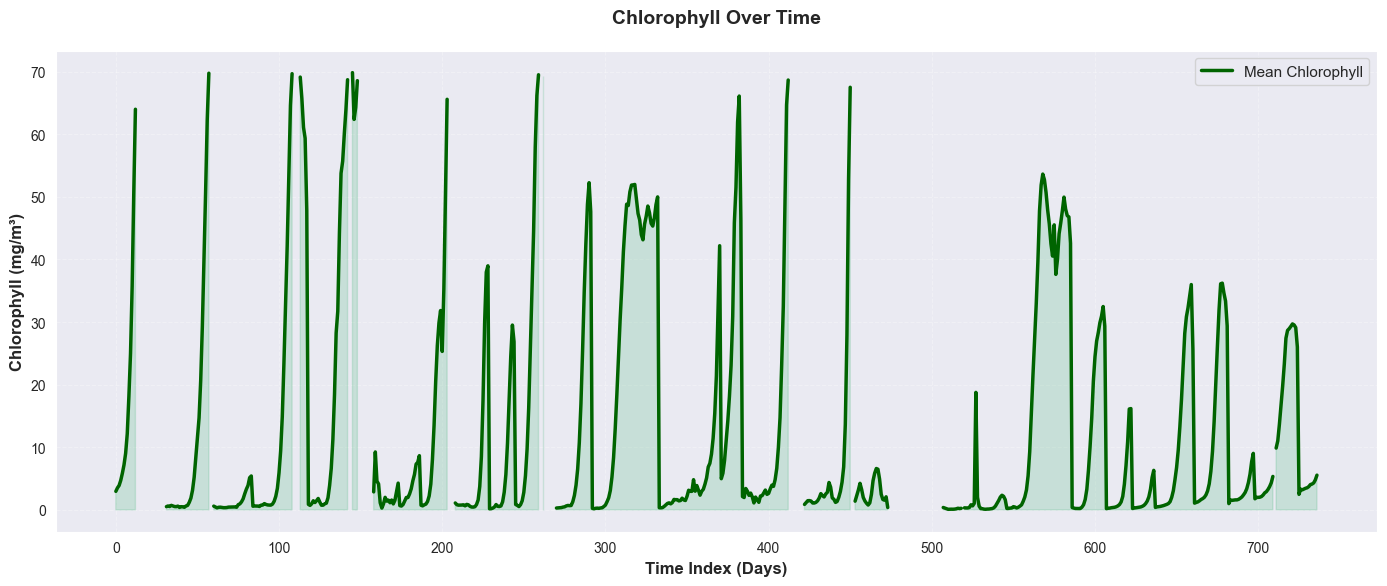

In [65]:
# Chlorophyll: Time Series Line Graph
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_chlorophyll)), df_chlorophyll['Mean'], linewidth=2.5, color='darkgreen', label='Mean Chlorophyll')
ax.fill_between(range(len(df_chlorophyll)), df_chlorophyll['Mean'], alpha=0.2, color='mediumseagreen')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Chlorophyll (mg/m³)', fontsize=12, fontweight='bold')
ax.set_title('Chlorophyll Over Time', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

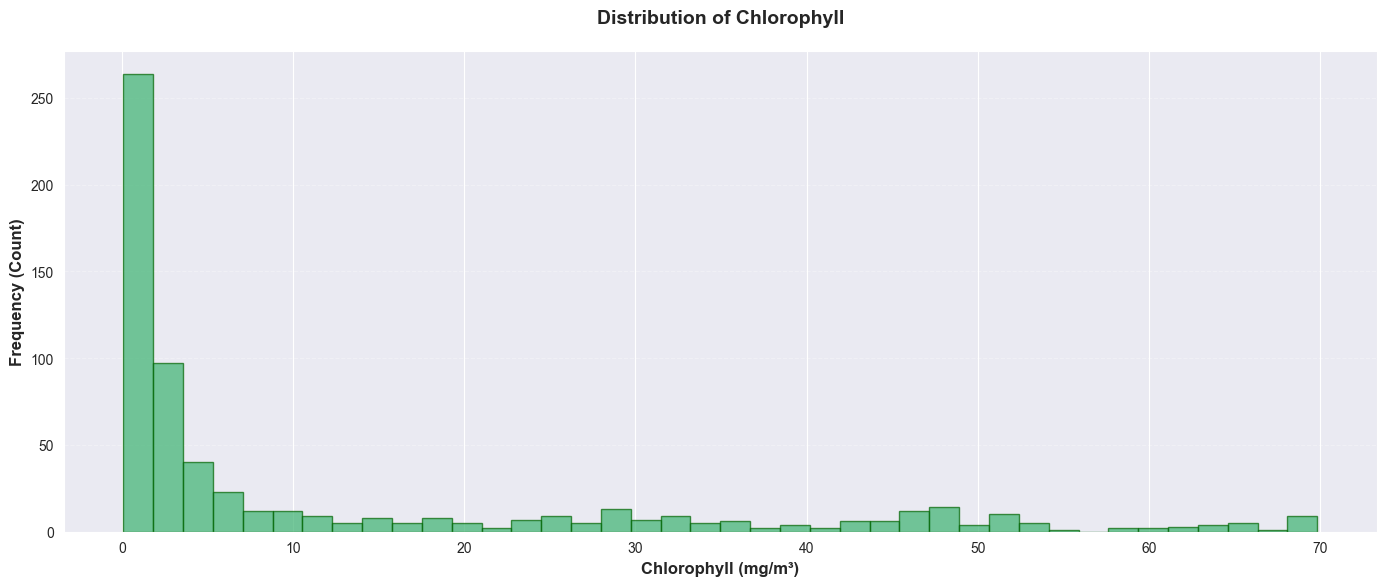

In [66]:
# Chlorophyll: Histogram Distribution
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(df_chlorophyll['Mean'].dropna(), bins=40, color='mediumseagreen', edgecolor='darkgreen', alpha=0.7)
ax.set_xlabel('Chlorophyll (mg/m³)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency (Count)', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Chlorophyll', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Dataset 3: Oxygen-Saturation 

In [67]:
# Overview of Oxygen-Saturation Dataset
print("=" * 60)
print("OXYGEN-SATURATION DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {df_oxygen_sat.shape}")
print(f"Columns: {list(df_oxygen_sat.columns)}\n")
print(df_oxygen_sat.head(10))
print("\n" + "=" * 60)

OXYGEN-SATURATION DATASET OVERVIEW

Shape: (737, 5)
Columns: ['Start date', 'End date', 'Mean', 'Min', 'Max']

                 Start date                  End date      Mean    Min    Max
0 2023-12-30 00:00:00+00:00 2023-12-31 00:00:00+00:00  3.490111  0.704  6.649
1 2023-12-31 00:00:00+00:00 2024-01-01 00:00:00+00:00       NaN    NaN    NaN
2 2024-01-01 00:00:00+00:00 2024-01-02 00:00:00+00:00       NaN    NaN    NaN
3 2024-01-02 00:00:00+00:00 2024-01-03 00:00:00+00:00       NaN    NaN    NaN
4 2024-01-03 00:00:00+00:00 2024-01-04 00:00:00+00:00       NaN    NaN    NaN
5 2024-01-04 00:00:00+00:00 2024-01-05 00:00:00+00:00       NaN    NaN    NaN
6 2024-01-05 00:00:00+00:00 2024-01-06 00:00:00+00:00       NaN    NaN    NaN
7 2024-01-06 00:00:00+00:00 2024-01-07 00:00:00+00:00       NaN    NaN    NaN
8 2024-01-07 00:00:00+00:00 2024-01-08 00:00:00+00:00       NaN    NaN    NaN
9 2024-01-08 00:00:00+00:00 2024-01-09 00:00:00+00:00       NaN    NaN    NaN



In [68]:
# Statistical Summary for Oxygen-Saturation
print("\nSTATISTICAL SUMMARY:")
print(df_oxygen_sat.describe().round(3))
print("\nMISSING VALUES:")
print(df_oxygen_sat.isnull().sum())
print("\nDATA TYPES:")
print(df_oxygen_sat.dtypes)


STATISTICAL SUMMARY:
          Mean      Min      Max
count  474.000  474.000  474.000
mean    94.071   80.591  106.234
std     16.861   20.196   20.663
min      3.322    0.443    6.649
25%     88.364   72.470   96.854
50%     96.039   86.269  104.946
75%    103.978   94.846  117.310
max    128.813  108.591  182.480

MISSING VALUES:
Start date      0
End date        0
Mean          263
Min           263
Max           263
dtype: int64

DATA TYPES:
Start date    datetime64[ns, UTC]
End date      datetime64[ns, UTC]
Mean                      float64
Min                       float64
Max                       float64
dtype: object


In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_oxygen_sat)), df_oxygen_sat['Mean'], linewidth=2.5, color='darkorange', label='Mean Oxygen Saturation')
ax.fill_between(range(len(df_oxygen_sat)), df_oxygen_sat['Mean'], alpha=0.2, color='orange')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Oxygen Saturation (%)', fontsize=12, fontweight='bold')
ax.set_title('Oxygen-Saturation Over Time', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

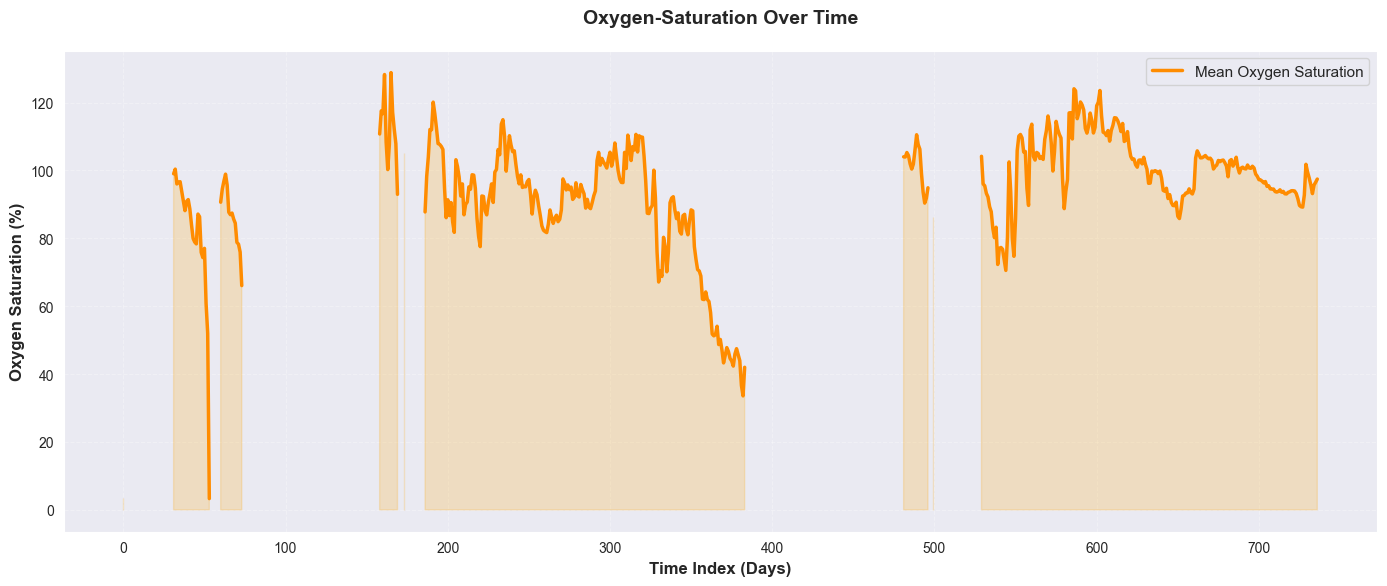

In [69]:
# Oxygen-Saturation: Time Series Line Graph
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_oxygen_sat)), df_oxygen_sat['Mean'], linewidth=2.5, color='darkorange', label='Mean Oxygen Saturation')
ax.fill_between(range(len(df_oxygen_sat)), df_oxygen_sat['Mean'], alpha=0.2, color='orange')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Oxygen Saturation (%)', fontsize=12, fontweight='bold')
ax.set_title('Oxygen-Saturation Over Time', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

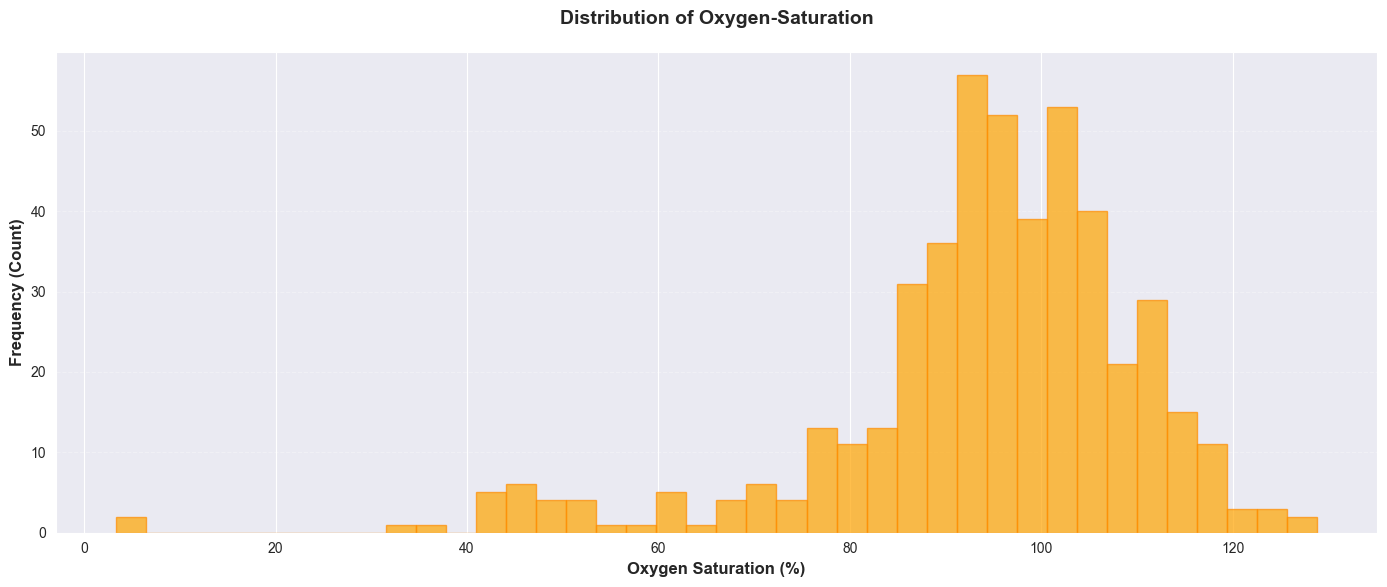

In [70]:
# Oxygen-Saturation: Histogram Distribution
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(df_oxygen_sat['Mean'].dropna(), bins=40, color='orange', edgecolor='darkorange', alpha=0.7)
ax.set_xlabel('Oxygen Saturation (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency (Count)', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Oxygen-Saturation', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Dataset 4: Fluroescent

In [5]:
# Overview of Fluroescent Dataset
print("=" * 60)
print("FLUROESCENT DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {df_fluroescent.shape}")
print(f"Columns: {list(df_fluroescent.columns)}\n")
df_fluroescent.head(10)

FLUROESCENT DATASET OVERVIEW

Shape: (395, 5)
Columns: ['Start date', 'End date', 'Mean', 'Min', 'Max']



,Start date,End date,Mean,Min,Max
0,2024-12-04 00:00:00+00:00,2024-12-05 00:00:00+00:00,2.649882,-1.63,5.90
1,2024-12-05 00:00:00+00:00,2024-12-06 00:00:00+00:00,2.732917,-1.63,5.90
2,2024-12-06 00:00:00+00:00,2024-12-07 00:00:00+00:00,2.784930,-1.45,6.45
3,2024-12-07 00:00:00+00:00,2024-12-08 00:00:00+00:00,2.891226,-0.18,5.99
4,2024-12-08 00:00:00+00:00,2024-12-09 00:00:00+00:00,2.734889,-0.64,6.36
5,2024-12-09 00:00:00+00:00,2024-12-10 00:00:00+00:00,2.533028,-1.00,5.63
6,2024-12-10 00:00:00+00:00,2024-12-11 00:00:00+00:00,2.637611,-0.09,6.36
7,2024-12-11 00:00:00+00:00,2024-12-12 00:00:00+00:00,2.677083,-0.91,5.63
8,2024-12-12 00:00:00+00:00,2024-12-13 00:00:00+00:00,2.941639,0.36,5.99
9,2024-12-13 00:00:00+00:00,2024-12-14 00:00:00+00:00,2.839278,-0.18,5.90


In [6]:
# Statistical Summary for Fluroescent
print("\nSTATISTICAL SUMMARY:")
print(df_fluroescent.describe().round(3))
print("\nMISSING VALUES:")
print(df_fluroescent.isnull().sum())
print("\nDATA TYPES:")
print(df_fluroescent.dtypes)


STATISTICAL SUMMARY:
          Mean      Min      Max
count  341.000  341.000  341.000
mean     3.761    0.538   31.270
std      4.414    1.884   50.026
min      1.277   -1.720    3.450
25%      2.232   -0.180    5.080
50%      2.748    0.270    9.170
75%      3.457    0.730   35.680
max     59.248   13.530  294.960

MISSING VALUES:
Start date     0
End date       0
Mean          54
Min           54
Max           54
dtype: int64

DATA TYPES:
Start date    datetime64[ns, UTC]
End date      datetime64[ns, UTC]
Mean                      float64
Min                       float64
Max                       float64
dtype: object


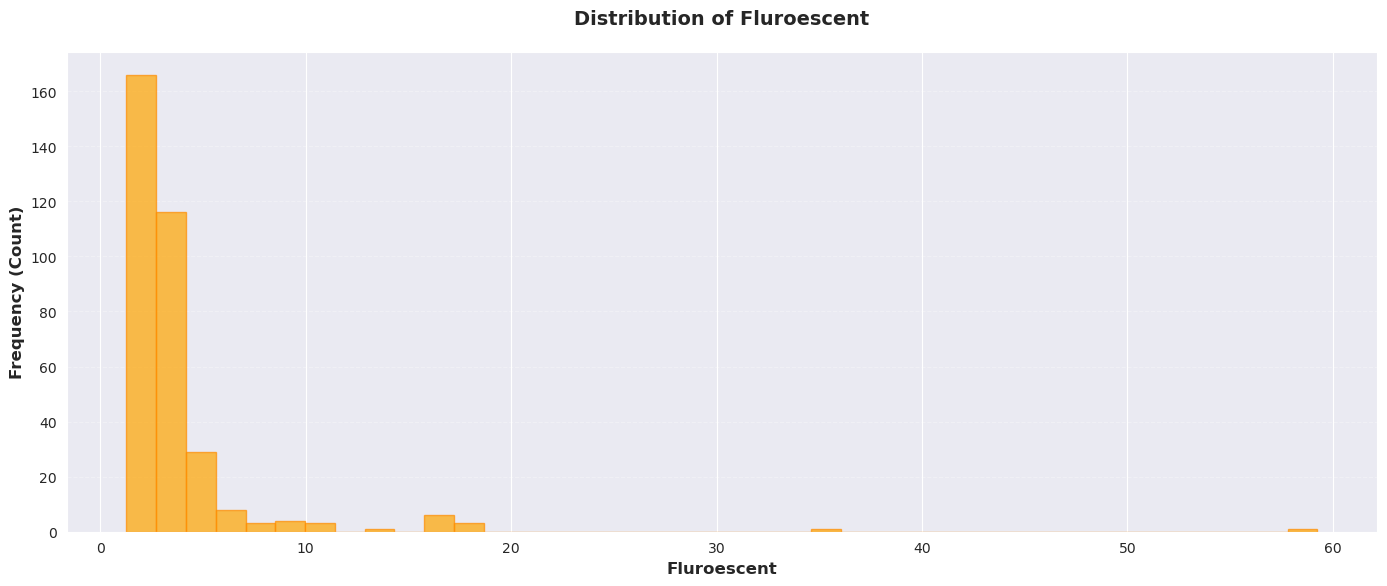

In [7]:
# Oxygen-Saturation: Fluroescent Distribution
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(df_fluroescent['Mean'].dropna(), bins=40, color='orange', edgecolor='darkorange', alpha=0.7)
ax.set_xlabel('Fluroescent', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency (Count)', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Fluroescent', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Comparative Analysis

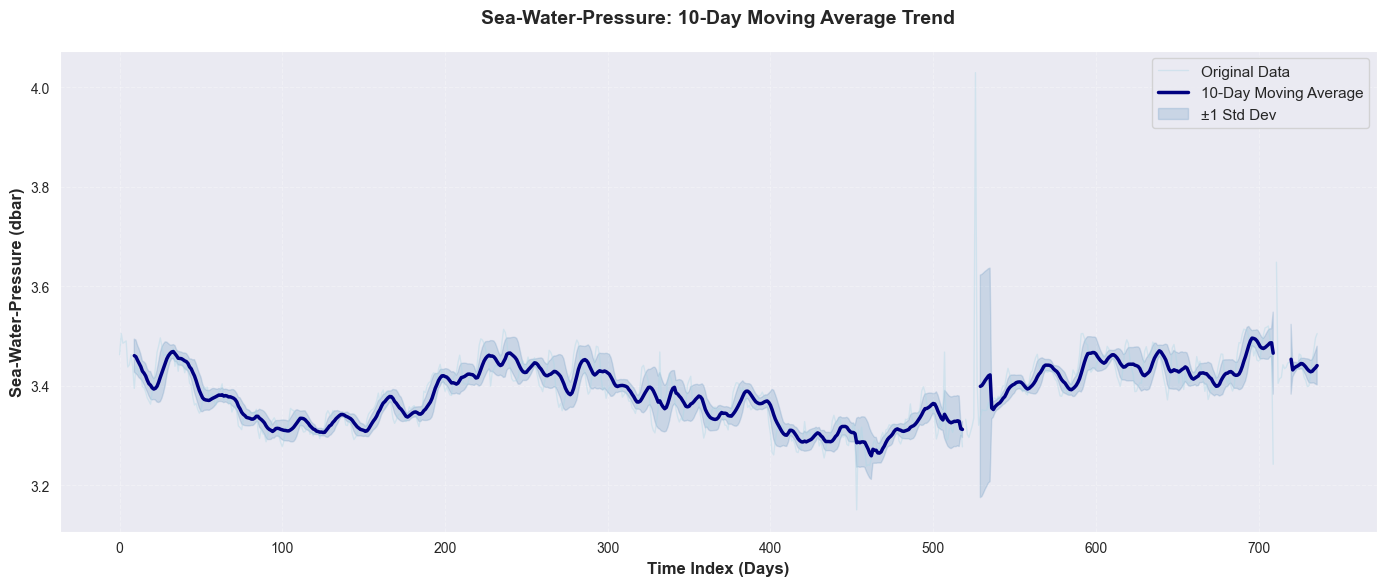

In [71]:
# Moving Average Trend: Sea-Water-Pressure
rolling_mean = df_pressure['Mean'].rolling(window=10).mean()
rolling_std = df_pressure['Mean'].rolling(window=10).std()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_pressure)), df_pressure['Mean'], label='Original Data', alpha=0.4, color='lightblue', linewidth=1)
ax.plot(range(len(df_pressure)), rolling_mean, label='10-Day Moving Average', color='navy', linewidth=2.5)
ax.fill_between(range(len(df_pressure)), rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2, color='steelblue', label='±1 Std Dev')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Sea-Water-Pressure (dbar)', fontsize=12, fontweight='bold')
ax.set_title('Sea-Water-Pressure: 10-Day Moving Average Trend', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

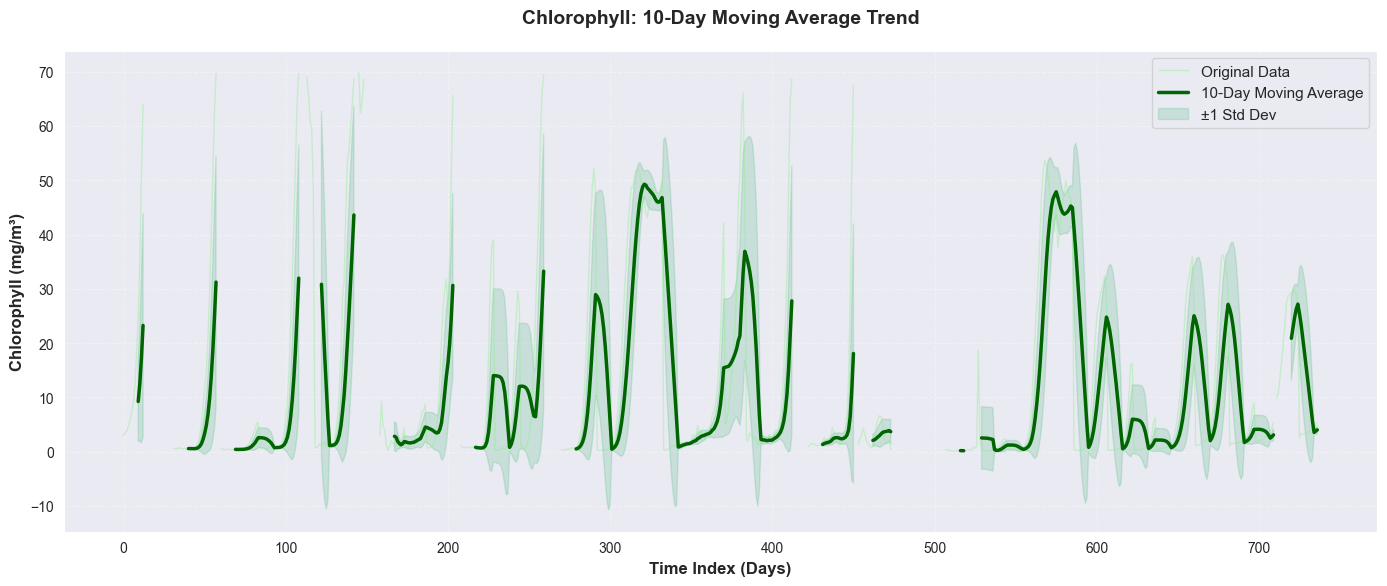

In [72]:
# Moving Average Trend: Chlorophyll
rolling_mean = df_chlorophyll['Mean'].rolling(window=10).mean()
rolling_std = df_chlorophyll['Mean'].rolling(window=10).std()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_chlorophyll)), df_chlorophyll['Mean'], label='Original Data', alpha=0.4, color='lightgreen', linewidth=1)
ax.plot(range(len(df_chlorophyll)), rolling_mean, label='10-Day Moving Average', color='darkgreen', linewidth=2.5)
ax.fill_between(range(len(df_chlorophyll)), rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2, color='mediumseagreen', label='±1 Std Dev')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Chlorophyll (mg/m³)', fontsize=12, fontweight='bold')
ax.set_title('Chlorophyll: 10-Day Moving Average Trend', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

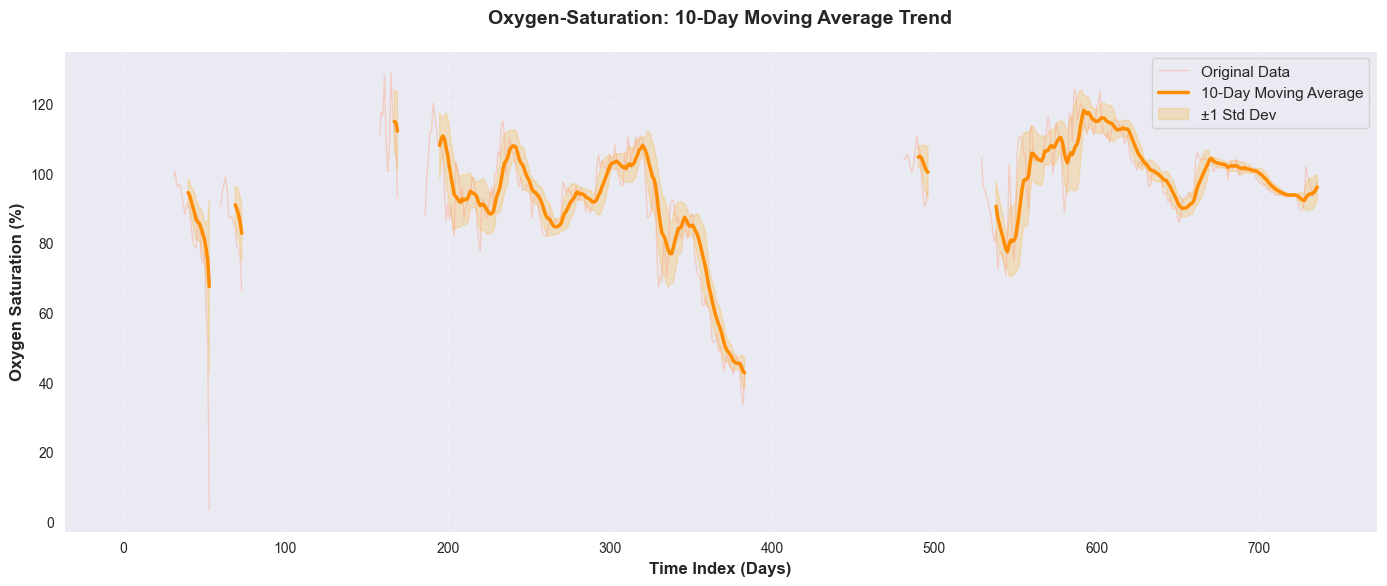

In [73]:
# Moving Average Trend: Oxygen-Saturation
rolling_mean = df_oxygen_sat['Mean'].rolling(window=10).mean()
rolling_std = df_oxygen_sat['Mean'].rolling(window=10).std()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_oxygen_sat)), df_oxygen_sat['Mean'], label='Original Data', alpha=0.4, color='lightsalmon', linewidth=1)
ax.plot(range(len(df_oxygen_sat)), rolling_mean, label='10-Day Moving Average', color='darkorange', linewidth=2.5)
ax.fill_between(range(len(df_oxygen_sat)), rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2, color='orange', label='±1 Std Dev')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Oxygen Saturation (%)', fontsize=12, fontweight='bold')
ax.set_title('Oxygen-Saturation: 10-Day Moving Average Trend', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()

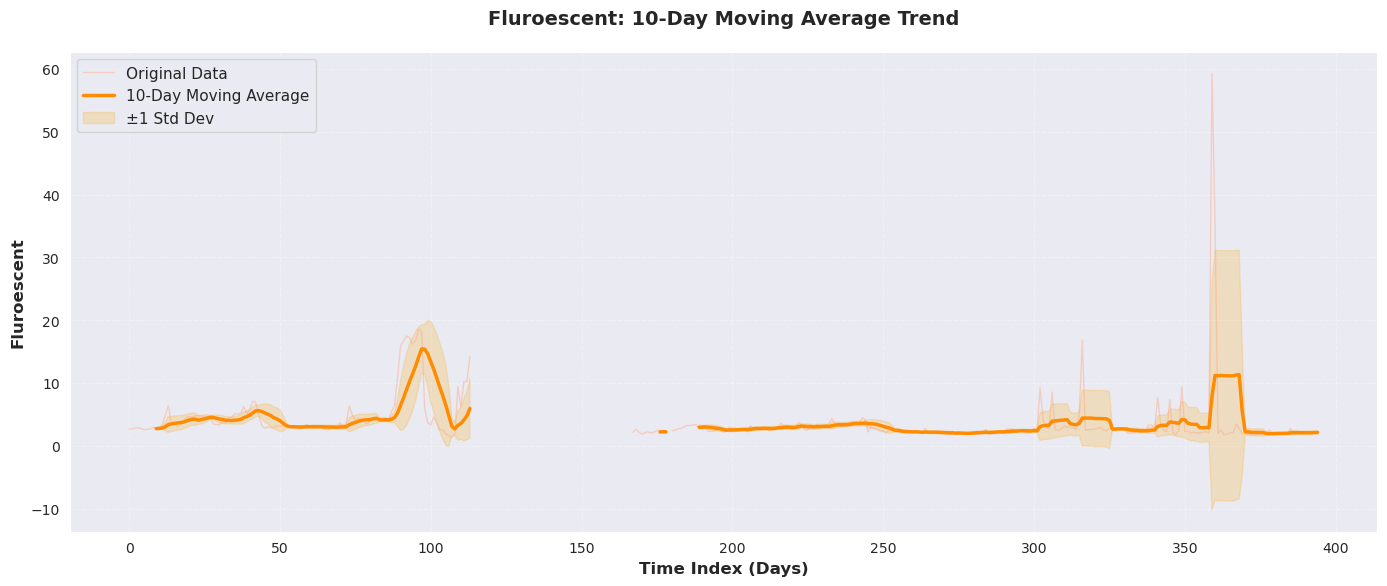

In [8]:
# Moving Average Trend: Oxygen-Saturation
rolling_mean = df_fluroescent['Mean'].rolling(window=10).mean()
rolling_std = df_fluroescent['Mean'].rolling(window=10).std()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(len(df_fluroescent)), df_fluroescent['Mean'], label='Original Data', alpha=0.4, color='lightsalmon', linewidth=1)
ax.plot(range(len(df_fluroescent)), rolling_mean, label='10-Day Moving Average', color='darkorange', linewidth=2.5)
ax.fill_between(range(len(df_fluroescent)), rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2, color='orange', label='±1 Std Dev')
ax.set_xlabel('Time Index (Days)', fontsize=12, fontweight='bold')
ax.set_ylabel('Fluroescent', fontsize=12, fontweight='bold')
ax.set_title('Fluroescent: 10-Day Moving Average Trend', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()